In [291]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 300)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_context("poster")
sns.set(color_codes=True)
sns.set_style("whitegrid")

from sklearn import preprocessing

In [191]:
ls_2014 = "http://myneta.info/ls2014/index.php?action=show_winners&sort=default"
ls_2009 = "http://myneta.info/ls2009/index.php?action=show_winners&sort=default"
ls_2004 = "http://myneta.info/loksabha2004/index.php?action=show_winners&sort=default"
base_2014 = "http://myneta.info/ls2014/"
base_2009 = "http://myneta.info/ls2009/"
base_2004 = "http://myneta.info/loksabha2004/"

url_list={'2004':ls_2004,'2009':ls_2009,'2014':ls_2014}
base_urls = {'2004':base_2004,'2009':base_2009,'2014':base_2014}

winners = pd.read_csv('../winners.csv')
all_elects = pd.read_csv('../multiple_elections.csv')

In [192]:
winners['full_link'] = winners.year.apply(lambda x: base_urls[str(x)])
winners.full_link = winners.full_link + winners.url

In [193]:
winners.head(3)

,Unnamed: 0,assets,constituency,crim_cases,education,idnum,liabilities,name,party,url,year,full_link
0,0,10378857,ADILABAD,0,Post Graduate,1,148784,Godam Nagesh,TRS,candidate.php?candidate_id=7674,2014,http://myneta.info/ls2014/candidate.php?candid...
1,1,14634885,AGRA,21,Doctorate,2,4035000,Dr. Ramshankar Katheria,BJP,candidate.php?candidate_id=4916,2014,http://myneta.info/ls2014/candidate.php?candid...
2,2,795211576,AHMEDABAD EAST,0,12th Pass,3,81472461,Paresh Dahyalal Rawal,BJP,candidate.php?candidate_id=5283,2014,http://myneta.info/ls2014/candidate.php?candid...


In [194]:
winner_list = list(winners.full_link)

In [195]:
def find_year(yr_string):
    found = re.findall(r'\d+',yr_string)
    if len(found):
        return found[0]
    else :
        return "0"

In [196]:
all_elects['is_winner'] = all_elects.elec_link.apply(lambda x: x in winner_list)
all_elects['year'] = all_elects.elec_link.apply(lambda x: find_year(x.split('/')[3]))

for link, df in all_elects.groupby('common_link'):
        df.sort()

In [197]:
winner_link = winner_link[winner_link.elec_link.isin(winner_list)].common_link

In [198]:
winners = all_elects[all_elects.common_link.isin(winner_link)]
losers = all_elects[~all_elects.common_link.isin(winner_link)]

In [199]:
winners.head(5)

,Unnamed: 0,Age,Constituency,Criminal_Cases,Education_Level,Name,Number_of_Cases,PAN_Given_(Y_or_N),Party_Code,Total_Assets,Total_Liabilities,common_link,elec_link,is_winner,year
0,0,71,Hazaribagh,Yes,Post Graduate,YASHWANT SINHA in Lok Sabha 2009,1,Y,BJP,36576217,0,http://myneta.info/compare_profile.php?group_i...,http://myneta.info/ls2009/candidate.php?candid...,True,2009
1,1,66,Hazaribagh,No,Post Graduate,YASHWANT SINHA in Lok Sabha 2004,0,Y,BJP,15637769,0,http://myneta.info/compare_profile.php?group_i...,http://myneta.info/loksabha2004/candidate.php?...,False,2004
2,2,78,SHIMLA RURAL,Yes,Post Graduate,Virbhadra Singh in Himachal Pradesh 2012,1,Y,INC,336564971,2402720,http://myneta.info/compare_profile.php?group_i...,http://myneta.info/hp2012/candidate.php?candid...,False,2012
3,3,0,MINISTER,No,Not Given,Shri Virbhadra Singh in Union Council of Minis...,0,N,INC,222299608,0,http://myneta.info/compare_profile.php?group_i...,http://myneta.info/unionministers2011/candidat...,False,2011
4,4,75,Mandi,No,Post Graduate,VIRBHADRA SINGH in Lok Sabha 2009,0,Y,INC,225228748,628864,http://myneta.info/compare_profile.php?group_i...,http://myneta.info/ls2009/candidate.php?candid...,True,2009


In [200]:
losers.head(3)

,Unnamed: 0,Age,Constituency,Criminal_Cases,Education_Level,Name,Number_of_Cases,PAN_Given_(Y_or_N),Party_Code,Total_Assets,Total_Liabilities,common_link,elec_link,is_winner,year
10,10,44,MAHBUBNAGAR,Yes,12th Pass,Ibrahim Syed\t in Loksabha 2014,7,Y,IND,310625000,56406000,http://myneta.info/compare_profile.php?group_i...,http://myneta.info/ls2014/candidate.php?candid...,False,2014
11,11,44,MAHBUBNAGAR,Yes,12th Pass,Ibrahim Syed in Telangana 2014,7,Y,IND,310625500,56406000,http://myneta.info/compare_profile.php?group_i...,http://myneta.info/telangana2014/candidate.php...,False,2014
12,12,42,MAHBUBNAGAR : BYE ELECTION ON 18-03-2012,Yes,12th Pass,Ibrahim Syed in Andhra Pradesh Bye Election,2,Y,TRS,167739500,52304000,http://myneta.info/compare_profile.php?group_i...,http://myneta.info/apbye/candidate.php?candida...,False,0


In [315]:
wingrp = winners.groupby('common_link')
win_list = []

for link, df in wingrp:
    win_dict = {}
    win_dict['link'] = link
    win_year_list = []
    for x in df.loc[df.is_winner, 'year']:
        win_year_list.append(x)
        
    win_dict['win_years'] = win_year_list    
    
    all_year_list = []
    for x in df.year:
        all_year_list.append(x)
    win_dict['all_years'] = all_year_list
    win_list.append(win_dict)

for candidate in win_list:
    select_year = []
    #print "YEAR WIN: %s" % candidate['win_years']
    remove_list = []
    for year_win in candidate['win_years']:
        success = 0
        for all_year in sorted(candidate['all_years']):
            if int(all_year) > int(year_win):
                select_year.append(all_year)
                success = 1
                break
            
        if success == 0:
            remove_list.append(year_win)
        
    
    candidate['win_years'] = [x for x in candidate['win_years'] if x not in remove_list]
    candidate['select_years'] = select_year

In [316]:
win_gain_list = []
for candidate in win_list:
    win_asset_gain = {}
    #print candidate
    
    gain_list = []
    gain_perc_list = []
    for i,year in enumerate(candidate['win_years']):
        post_year = candidate['select_years'][i]
        
        pre_win_assets =  winners[(winners.common_link==candidate['link']) & (winners.year == year)].Total_Assets.mean()
        post_win_assets = winners[(winners.common_link==candidate['link']) & (winners.year == post_year)].Total_Assets.mean()
        
        if pre_win_assets > 0:
            gain_list.append(post_win_assets - pre_win_assets)
            gain_perc_list.append((post_win_assets - pre_win_assets)/pre_win_assets)
            
        
    #print "Year: %s, Post_year: %s" % (year, post_year)
    win_asset_gain['gain'] = np.mean(gain_list)
    win_asset_gain['gain_perc'] = np.mean(gain_perc_list)
    win_asset_gain['link'] = candidate['link']
    
    win_gain_list.append(win_asset_gain)

In [317]:
losgrp = losers.groupby('common_link')
loss_list = []

for link, df in losgrp:
    loss_dict = {}
    loss_dict['link'] = link
    loss_year_list = []
    for x in df.loc[~df.is_winner, 'year']:
        if int(x) > 2000:
            loss_year_list.append(x)
        
    loss_dict['loss_years'] = loss_year_list    
    
    all_year_list = []
    for x in df.year:
        all_year_list.append(x)
    loss_dict['all_years'] = all_year_list
    loss_list.append(loss_dict)

for candidate in loss_list:
    select_year = []
    remove_list = []
    for year_loss in candidate['loss_years']:
        success = 0
        for all_year in sorted(candidate['all_years']):
            if int(all_year) > int(year_loss):
                select_year.append(all_year)
                success = 1
                break
            
        if success == 0:
            remove_list.append(year_loss)
    

    candidate['loss_years'] = [x for x in candidate['loss_years'] if x not in remove_list]
    candidate['select_years'] = select_year
    
    if candidate['link'] == 'http://myneta.info/compare_profile.php?group_id=2EYoFxnqToCTfZhqnC9b':
        print candidate['loss_years']
        print candidate['select_years']
        

In [318]:
loss_gain_list = []
for candidate in loss_list:
    loss_asset_gain = {}
    #print candidate
    
    gain_list = []
    gain_perc_list = []
    for i,year in enumerate(candidate['loss_years']):
        post_year = candidate['select_years'][i]
        
        pre_loss_assets =  losers[(losers.common_link==candidate['link']) & (losers.year == year)].Total_Assets.mean()
        post_loss_assets = losers[(losers.common_link==candidate['link']) & (losers.year == post_year)].Total_Assets.mean()
        
        if pre_loss_assets > 0:
            gain_list.append(post_loss_assets - pre_loss_assets)
            gain_perc_list.append((post_loss_assets - pre_loss_assets)/pre_loss_assets)
            
        
    #print "Year: %s, Post_year: %s" % (year, post_year)
    loss_asset_gain['gain'] = np.mean(gain_list)
    loss_asset_gain['gain_perc'] = np.mean(gain_perc_list)
    loss_asset_gain['link'] = candidate['link']
        
    loss_gain_list.append(loss_asset_gain)

In [332]:
df_win_gain = pd.DataFrame(win_gain_list)

print "GAIN: mean: %s, std: %s" % (df_win_gain[df_win_gain.gain > 0].gain.mean(), df_win_gain[df_win_gain.gain > 0].gain.std())
print "GAIN PERC: mean: %s, std: %s" % (df_win_gain[df_win_gain.gain > 0].gain_perc.mean(), df_win_gain[df_win_gain.gain > 0].gain_perc.std())


GAIN: mean: 75073973.4963, std: 233917442.247
GAIN PERC: mean: 3.10604971683, std: 4.80131607941


In [338]:
df_loss_gain = pd.DataFrame(loss_gain_list)

print "GAIN: mean: %s, std: %s" % (df_loss_gain[df_loss_gain.gain > 0].gain.mean(), df_loss_gain[df_loss_gain.gain > 0].gain.std())
print "GAIN PERC: mean: %s, std: %s" % (df_loss_gain[df_loss_gain.gain > 0].gain_perc.mean(), df_loss_gain[df_loss_gain.gain > 0].gain_perc.std())


GAIN: mean: 39933787.2763, std: 142490150.663
GAIN PERC: mean: 61.581892722, std: 1860.47863075


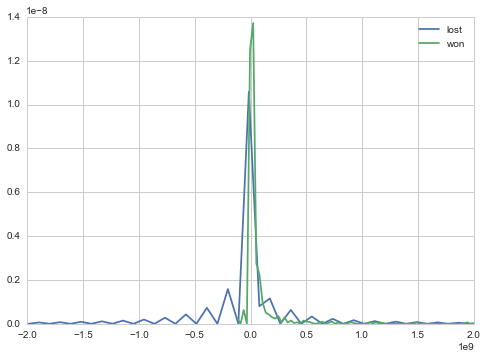

In [349]:
ax = plt.axes()
sns.kdeplot(df_loss_gain.gain, ax=ax, label='lost')
sns.kdeplot(df_win_gain.gain, ax=ax, label='won')
ax.set_xbound(lower=-0.2e10, upper=0.2e10)


In [334]:
df_win_gain[df_win_gain.gain > 0]

,gain,gain_perc,link
2,1.947387e+07,2.373812,http://myneta.info/compare_profile.php?group_i...
3,3.596580e+07,0.819188,http://myneta.info/compare_profile.php?group_i...
4,1.235728e+07,1.436775,http://myneta.info/compare_profile.php?group_i...
5,1.138700e+07,2.118512,http://myneta.info/compare_profile.php?group_i...
6,1.488924e+08,2.338915,http://myneta.info/compare_profile.php?group_i...
7,4.056935e+07,2.875821,http://myneta.info/compare_profile.php?group_i...
8,1.790158e+08,2.630525,http://myneta.info/compare_profile.php?group_i...
9,5.226333e+07,4.003813,http://myneta.info/compare_profile.php?group_i...
10,1.238000e+06,2.171930,http://myneta.info/compare_profile.php?group_i...
12,1.019338e+08,1.385297,http://myneta.info/compare_profile.php?group_i...
